In [11]:
from script import dataLoader
import os
import cv2
import matplotlib.pyplot as plt
folder_path = os.path.dirname("./data/")
import numpy as np

dl = dataLoader(folder_path)

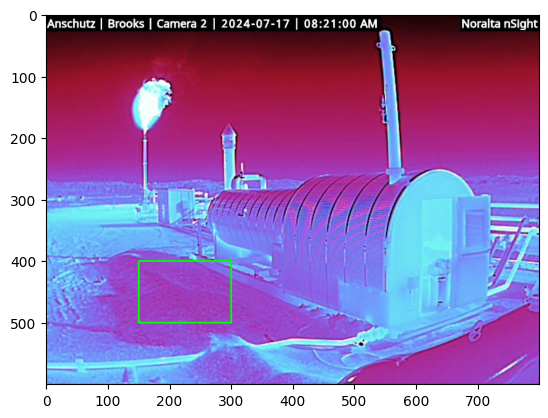

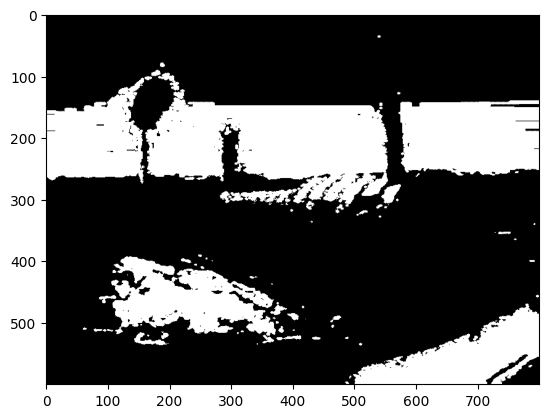

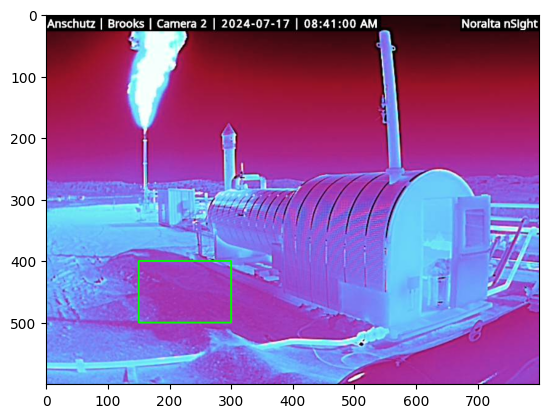

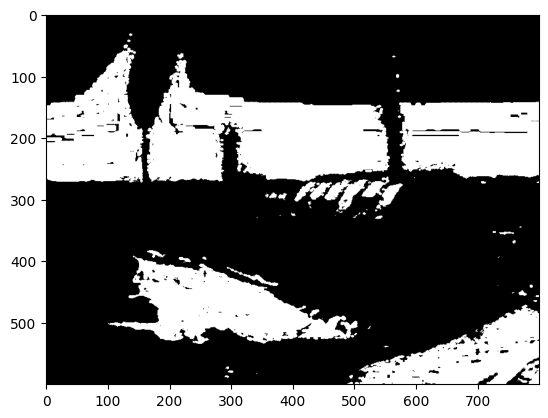

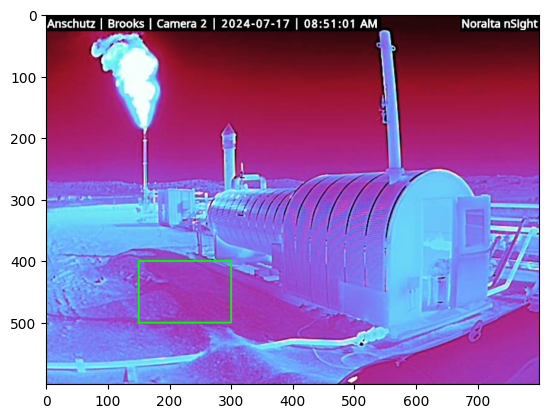

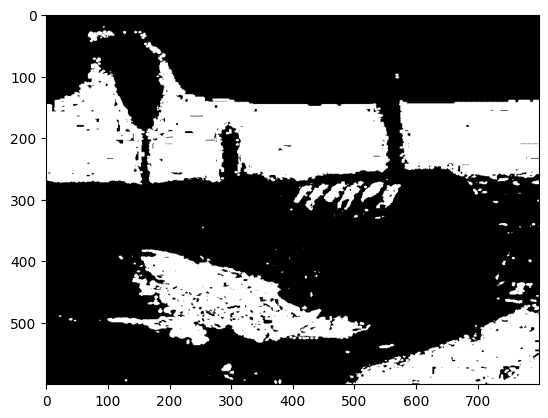

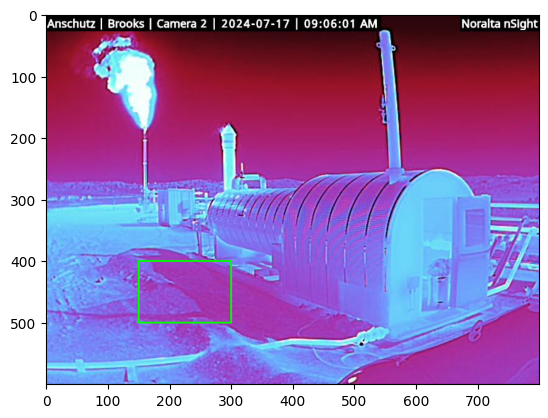

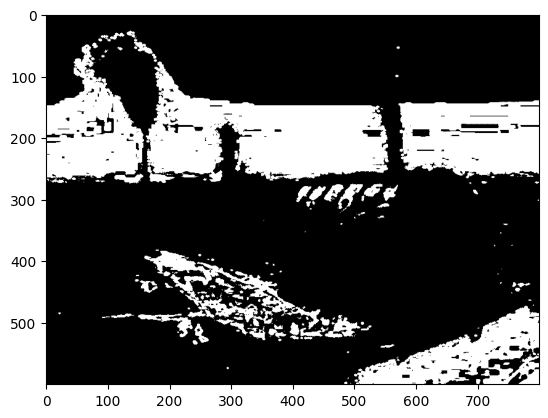

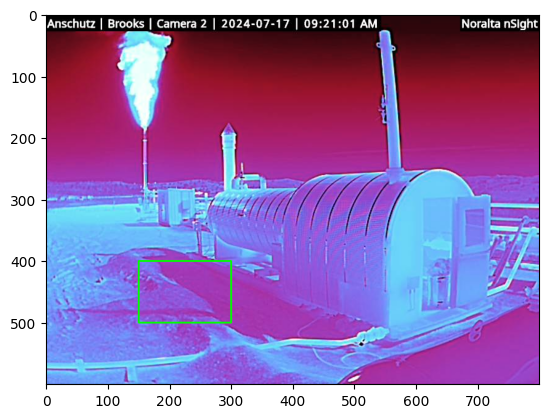

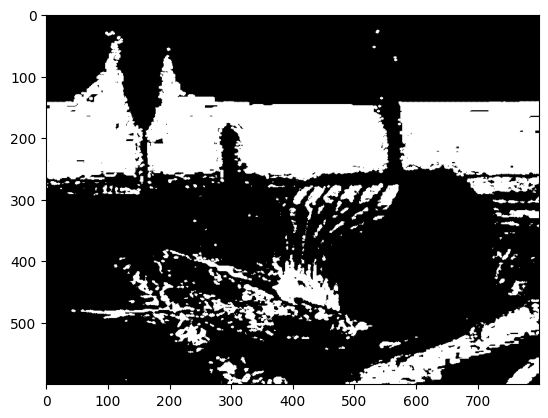

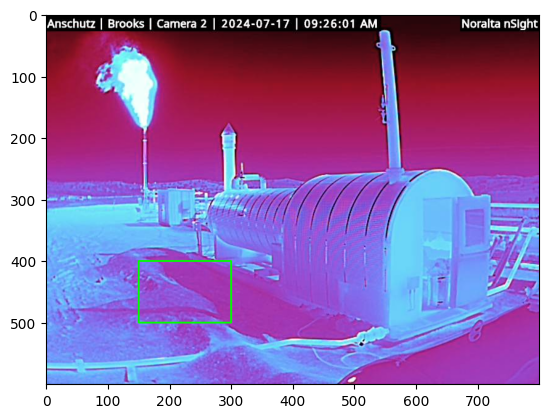

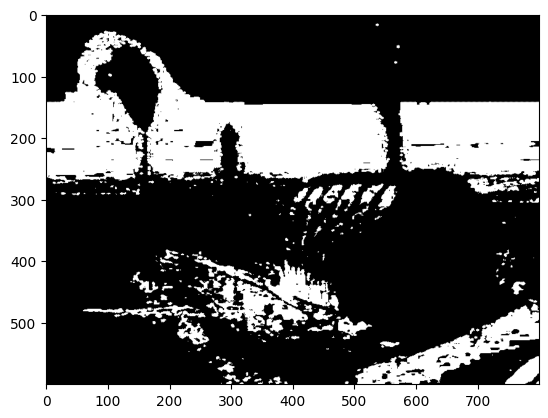

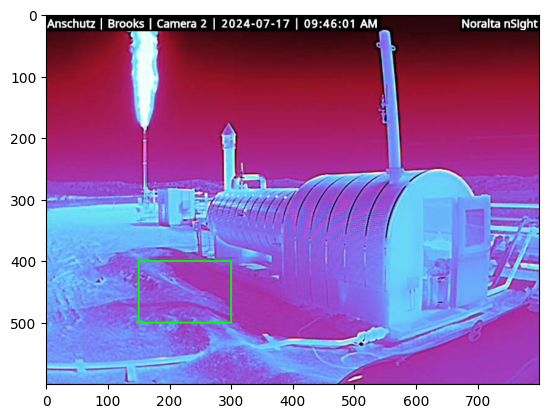

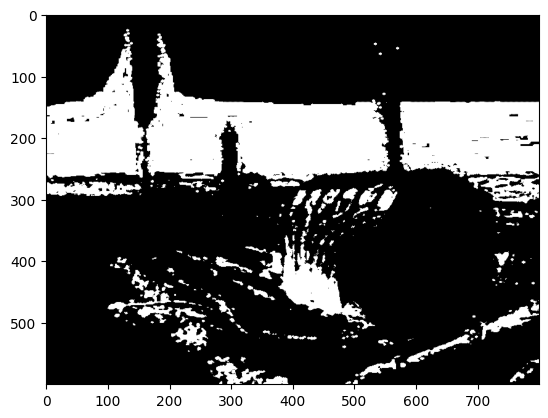

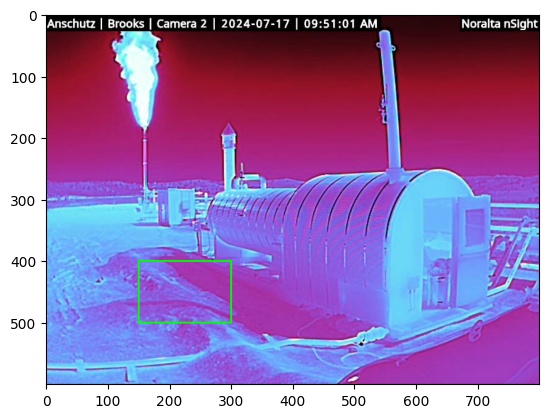

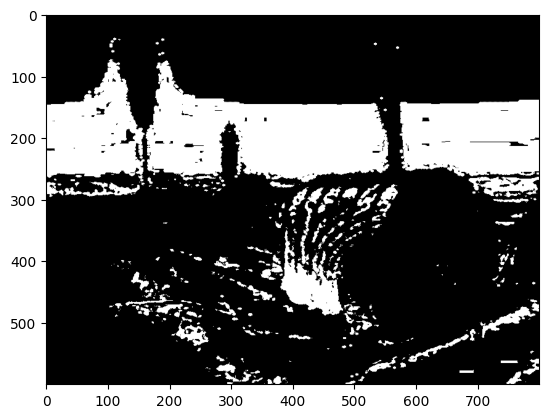

In [30]:
count = 0
for img_name in dl.groups[1]['entries']:
    img_path = os.path.join("./data/images/", img_name+'.jpg')
    image = cv2.imread(img_path)

    wmin, wmax, hmin, hmax = 150, 300, 400, 500
    bbox = image[wmin:wmax, hmin:hmax]
    hsv = cv2.cvtColor(bbox, cv2.COLOR_BGR2HSV)
    
    hsvt = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    cv2.rectangle(image, (wmin,400), (300, 500), (0, 255, 0), 2)
    imgplot = plt.imshow(image, vmin=0, vmax=255)
    plt.show()

    # calculating object histogram
    if count == 0:
        roihist = cv2.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )
    
    # normalize histogram and apply backprojection
    cv2.normalize(roihist,roihist,0,255,cv2.NORM_MINMAX)
    dst = cv2.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
     
    # Now convolute with circular disc
    disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
    cv2.filter2D(dst,-1,disc,dst)
     
    # threshold and binary AND
    ret,thresh = cv2.threshold(dst,50,255,0)
    thresh = cv2.merge((thresh,thresh,thresh))
    res = cv2.bitwise_and(target,thresh)
     
    res = np.vstack((target,thresh,res))
    imgplot = plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)
    plt.show()
